In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [22]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,NaN,-0.37708,NaN,0.03760,...,NaN,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,NaN,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [23]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	6
float64		column 8	0
float64		column 9	12
float64		column 10	0
float64		column 11	9
float64		column 12	0
float64		column 13	6
float64		column 14	0
float64		column 15	6
float64		column 16	0
float64		column 17	9
float64		column 18	0
float64		column 19	9
float64		column 20	0
float64		column 21	12
float64		column 22	3
float64		column 23	3
float64		column 24	0
float64		column 25	3
float64		column 26	0
float64		column 27	3
float64		column 28	0
float64		column 29	3
float64		column 30	0
float64		column 31	3
float64		column 32	0
float64		column 33	9
float64		column 34	0


In [24]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,345.000000,351.000000,339.000000,351.000000,...,348.000000,351.000000,348.000000,351.000000,348.000000,351.000000,348.000000,351.000000,342.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.548450,0.119360,0.512144,0.181345,...,0.401258,-0.071187,0.541075,-0.069538,0.381304,-0.027907,0.353021,-0.003794,0.352145,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.493768,0.520750,0.504691,0.483851,...,0.575213,0.508495,0.516949,0.550025,0.574417,0.507974,0.572988,0.513574,0.525538,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.215720,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.289258,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.727270,0.014710,0.684210,0.018290,...,0.555330,-0.015050,0.703345,-0.017690,0.499215,0.000000,0.446875,0.000000,0.421705,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.966830,0.445675,0.953240,0.534195,...,0.909400,0.156765,0.999918,0.153535,0.887798,0.154075,0.861930,0.200120,0.816778,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

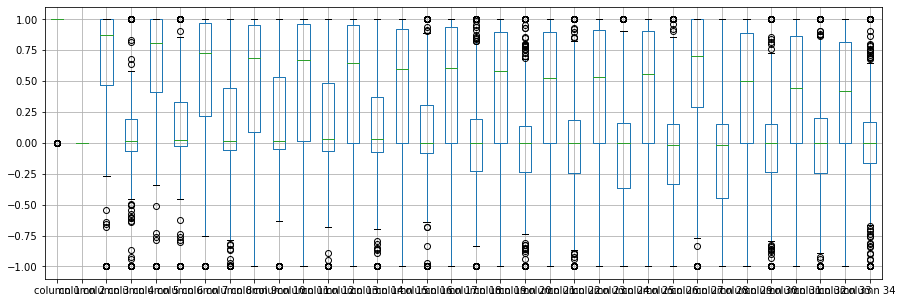

In [25]:
df.boxplot(return_type='axes', figsize=(15,5))

In [26]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.601068
column 6     0.115889
column 7     0.548450
column 8     0.119360
column 9     0.512144
column 10    0.181345
column 11    0.475185
column 12    0.155040
column 13    0.397428
column 14    0.093414
column 15    0.340835
column 16    0.071132
column 17    0.387727
column 18   -0.003617
column 19    0.361129
column 20   -0.024025
column 21    0.334789
column 22    0.009002
column 23    0.363785
column 24   -0.057406
column 25    0.401258
column 26   -0.071187
column 27    0.541075
column 28   -0.069538
column 29    0.381304
column 30   -0.027907
column 31    0.353021
column 32   -0.003794
column 33    0.352145
column 34    0.014480
dtype: float64

In [27]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.233549,0.027079,0.152456,-0.051883,...,-0.002491,0.149789,-0.198293,-0.010725,0.131778,-0.121415,0.167710,-0.100914,0.175699,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.442415,0.008717,0.467865,0.047916,...,0.298547,-0.073202,0.080433,0.123345,0.333530,0.057890,0.246734,-0.009332,0.271944,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.063094,0.255003,-0.316020,0.207697,...,-0.113275,-0.236987,-0.040869,0.000743,-0.045263,0.342301,-0.172743,-0.122788,-0.161269,0.034608
column 5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.617649,-0.029794,0.428377,-0.034236,...,0.229115,-0.032254,0.141172,0.184517,0.251304,0.051068,0.400796,0.025681,0.407106,-0.099478
column 6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.003830,0.274747,-0.146665,0.200080,...,-0.196885,0.041787,-0.175736,-0.068775,-0.030916,-0.158090,-0.100555,0.316802,0.024636,0.185215
column 7,0.233549,NaN,0.442415,-0.063094,0.617649,-0.003830,1.000000,-0.168306,0.475436,-0.105014,...,0.292224,0.088633,0.094221,0.114329,0.302488,-0.024303,0.431271,-0.006063,0.550707,-0.076815
column 8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.168306,1.000000,-0.327421,0.373567,...,-0.177291,-0.133023,-0.254346,0.072373,-0.141268,0.078585,-0.168584,0.152381,-0.219122,0.360610
column 9,0.152456,NaN,0.467865,-0.316020,0.428377,-0.146665,0.475436,-0.327421,1.000000,-0.238995,...,0.349548,0.121862,0.193279,0.130526,0.321081,-0.016001,0.299672,-0.088645,0.366121,-0.119214
column 10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.105014,0.373567,-0.238995,1.000000,...,-0.255390,-0.043680,-0.251005,0.072018,-0.125361,-0.008578,-0.155064,-0.015640,-0.220099,0.098104


In [28]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [29]:
imputer = md.Midas(layer_structure = [34,34+20,34+20+20,34+20+20+20,34+20+20+20+20,34+20+20+20,34+20+20,34+20,34], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.199202219645183
Epoch: 1 , loss: 20.067124230521067
Epoch: 2 , loss: 20.06325122288295
Epoch: 3 , loss: 19.9934572492327
Epoch: 4 , loss: 19.97091157095773
Epoch: 5 , loss: 19.941456386021205
Epoch: 6 , loss: 19.70857611156645
Epoch: 7 , loss: 19.638500667753675
Epoch: 8 , loss: 19.76852117265974
Epoch: 9 , loss: 19.689647492908296
Epoch: 10 , loss: 19.366629282633465
Epoch: 11 , loss: 19.22141034262521
Epoch: 12 , loss: 18.75973301842099
Epoch: 13 , loss: 18.19602734701974
Epoch: 14 , loss: 17.797257060096378
Epoch: 15 , loss: 17.50205235254197
Epoch: 16 , loss: 17.683050110226585
Epoch: 17 , loss: 17.666377703348797
Epoch: 18 , loss: 17.576690764654252
Epoch: 19 , loss: 17.583200636364165
Epoch: 20 , loss: 17.532338233221147
Epoch: 21 , loss: 17.257152648199174
Epoch: 22 , loss: 17.404482886904763
Epoch: 23 , loss: 17.35138307298933
Epoch: 24 , loss: 17.533421788896835
Epoch: 25 , loss: 17.4939006

In [30]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [31]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [32]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [33]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,-0.367997,0.0,-0.536855,0.0,...,-0.177325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.175979,0.0
1,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
347,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [34]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [35]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [36]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

4.822784404330772

In [37]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [38]:
NRMS=numerator/denominator
NRMS


0.07044657431779294

In [39]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [40]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.465983,-0.37708,0.463145,0.03760,...,0.390785,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.362389,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.108680,-0.93597,1.000000,-0.04549,...,-0.203320,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.137380,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.889650,0.01198,...,0.575280,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.560450,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.000000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.323820,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.921060,-0.23255,0.771520,-0.16399,...,0.032860,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.953780,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.905460,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.945200,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.914830,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.939880,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.926970,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.910500,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AE_1(imp).xlsx", index=False, header=False)